In [80]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose, STL

from utils import average_hour

In [4]:
data_dir = "../InterpolationBaseline/data/Oct0123_Jan3024/"

area1_ids = ['JAJWJnroQCSJz0Dr9uVC1g', '_e49pbOSQseqTE5lu-6NMA']
area2_ids = ['pCPex6DkSdS0f5K2f7jyHg', 'xudEmbncQ7iqwy3sZ0jZvQ']
area3_ids = ['6nBLCf6WT06TOuUExPkBtA', 'JKiLhziTQ4eiYHQq3x01uw']

df_full = pd.read_csv(os.path.join(data_dir, area1_ids[0] + ".csv"))
df_full = average_hour(df_full)
df_full = df_full.loc[:, ['month', 'day', 'hour']]

area1_dfs = []
area2_dfs = []
area3_dfs = []

for id in area1_ids:
    df = pd.read_csv(data_dir + id + ".csv")
    df = average_hour(df)
    if len(df) == 24 * 122:
        print("Length correct")
    else:
        df = df_full.merge(df, on=['month', 'day', 'hour'], how='left')
        print("Length incorrect")
    area1_dfs.append(df)

for id in area2_ids:
    df = pd.read_csv(data_dir + id + ".csv")
    df = average_hour(df)
    if len(df) == 24 * 122:
        print("Length correct")
    else:
        df = df_full.merge(df, on=['month', 'day', 'hour'], how='left')
        print("Length incorrect")
    area2_dfs.append(df)

for id in area3_ids:
    df = pd.read_csv(data_dir + id + ".csv")
    df = average_hour(df)
    if len(df) == 24 * 122:
        print("Length correct")
    else:
        df = df_full.merge(df, on=['month', 'day', 'hour'], how='left')
        print("Length incorrect")
    area3_dfs.append(df)

Length correct
Length correct
Length correct
Length correct
Length incorrect
Length correct


In [24]:
all_dfs = area1_dfs + area2_dfs + area3_dfs

In [10]:
area3_dfs[0]["pm25"].isnull().sum()

581

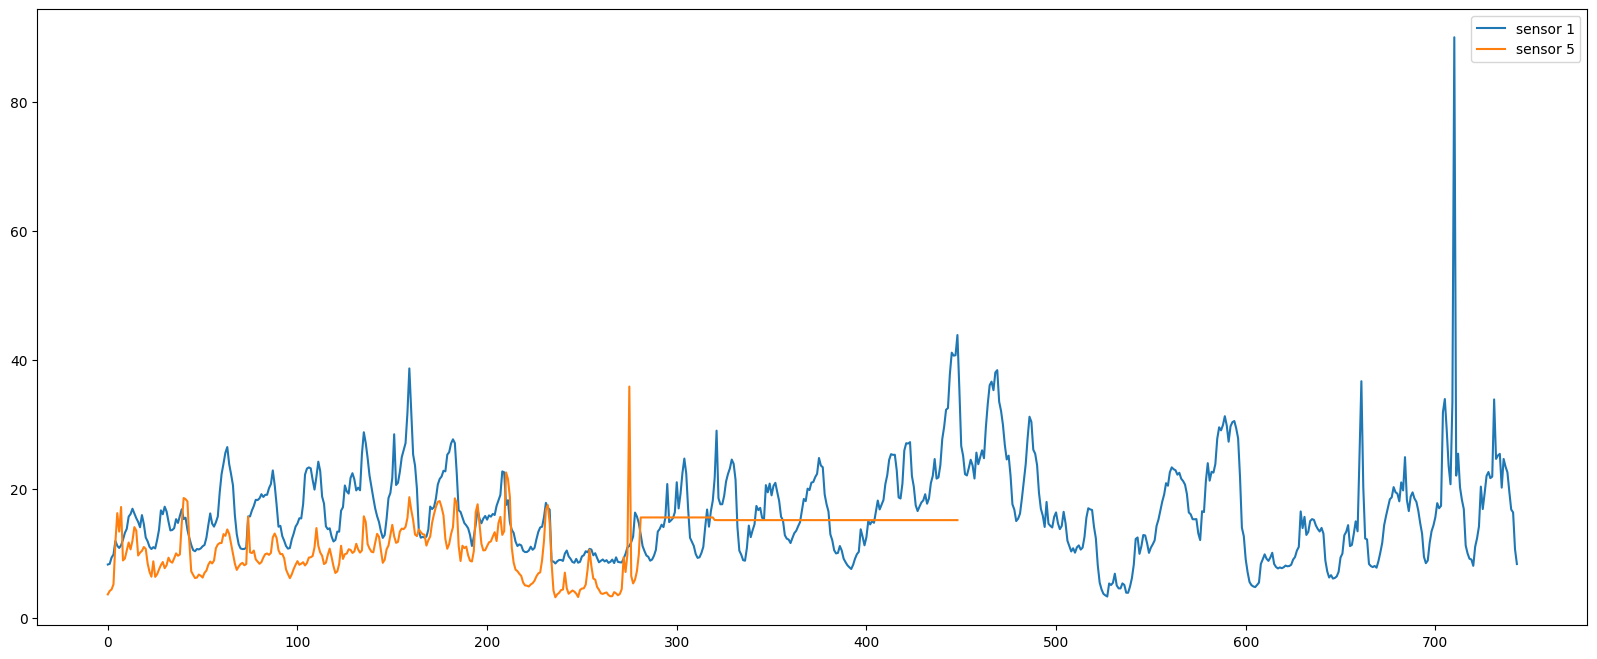

In [124]:
fig, ax = plt.subplots(figsize=(20, 8))
plt.plot(area1_dfs[0]["pm25"][:250], label="sensor 1")
# plt.plot(area1_dfs[1]["pm25"][:24*31], label="sensor 2")
# plt.plot(area2_dfs[0]["pm25"][:24*31], label="sensor 3")
# plt.plot(area2_dfs[1]["pm25"][:24*31], label="sensor 4")
plt.plot(area3_dfs[0]["pm25"][:24*31], label="sensor 5")
# plt.plot(area3_dfs[1]["pm25"][:24*31], label="sensor 6")
plt.legend()
plt.show()

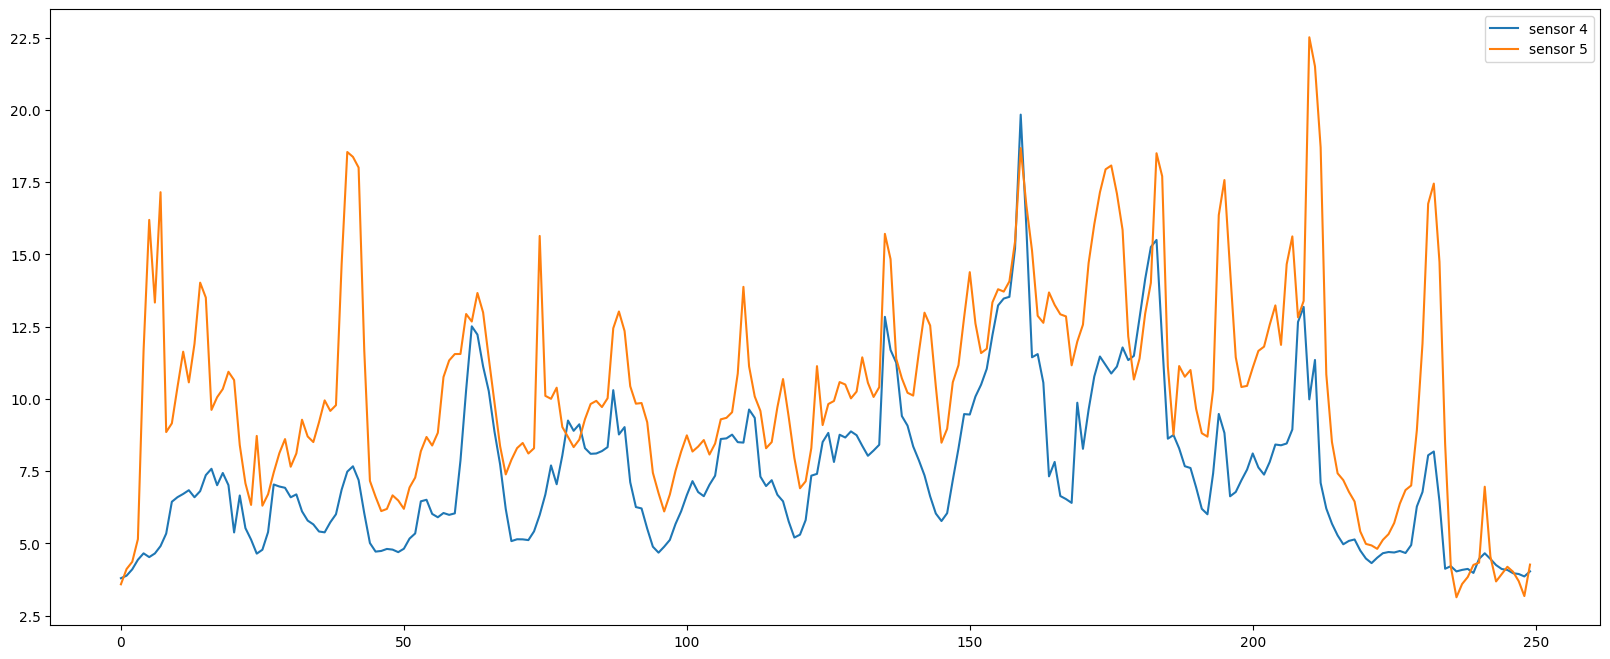

0.6935155498336263


In [125]:
fig, ax = plt.subplots(figsize=(20, 8))
start_index = 0
end_index = 250
# plt.plot(all_dfs[0]["pm25"][start_index:end_index], label="sensor 1")
# plt.plot(all_dfs[1]["pm25"][start_index:end_index], label="sensor 2")
# plt.plot(all_dfs[2]["pm25"][start_index:end_index], label="sensor 3")
plt.plot(all_dfs[3]["pm25"][start_index:end_index], label="sensor 4")
plt.plot(all_dfs[4]["pm25"][start_index:end_index], label="sensor 5")
# plt.plot(all_dfs[5]["pm25"][start_index:end_index], label="sensor 6")
plt.legend()
plt.show()
print(np.corrcoef(all_dfs[3]["pm25"][start_index:end_index], all_dfs[4]["pm25"][start_index:end_index])[0, 1])

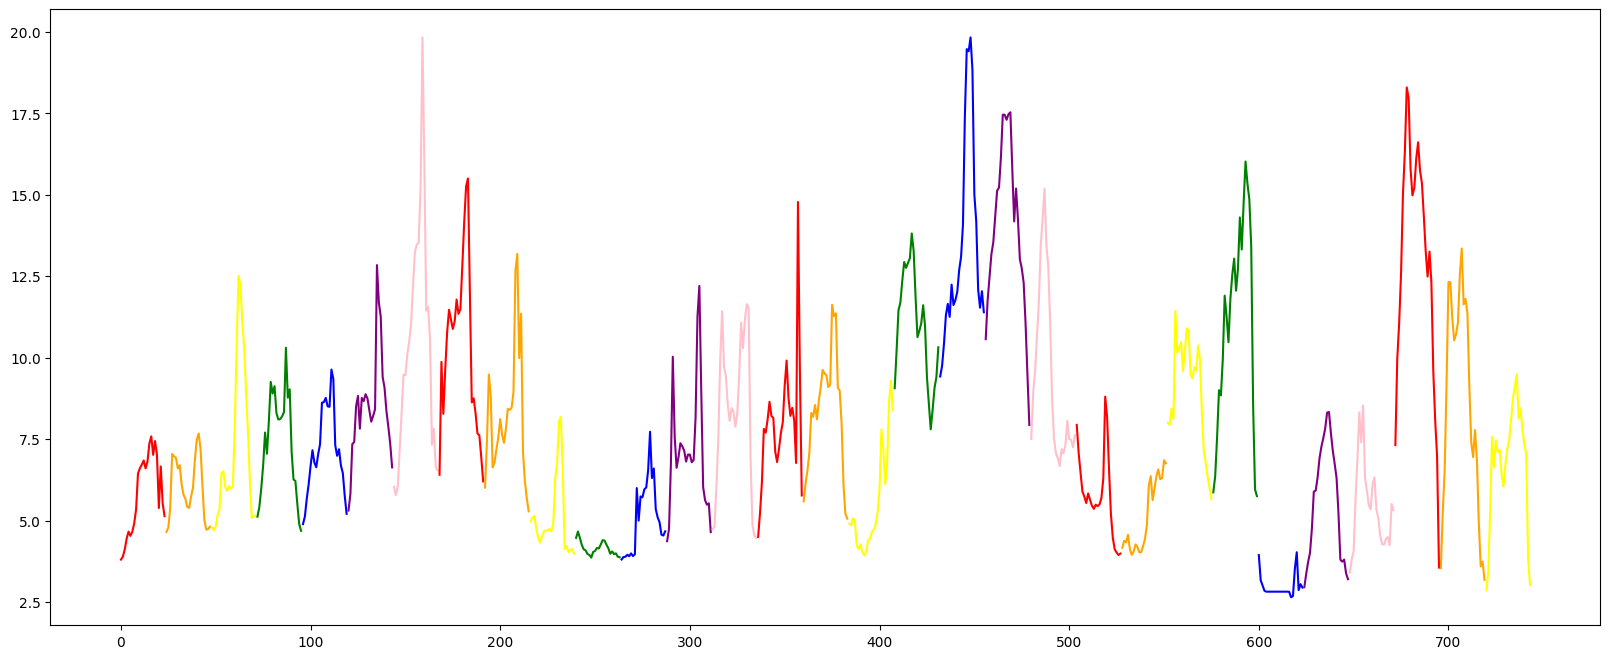

In [74]:
colors = ['red', 'orange', 'yellow', 'green', 'blue', 'purple', 'pink']
fig, ax = plt.subplots(figsize=(20, 8))
for day in range(31):
    start_index = 24 * day
    end_index = 24 * (day + 1)
    plt.plot(all_dfs[3]["pm25"][start_index:end_index], color=colors[day%7])
plt.show()

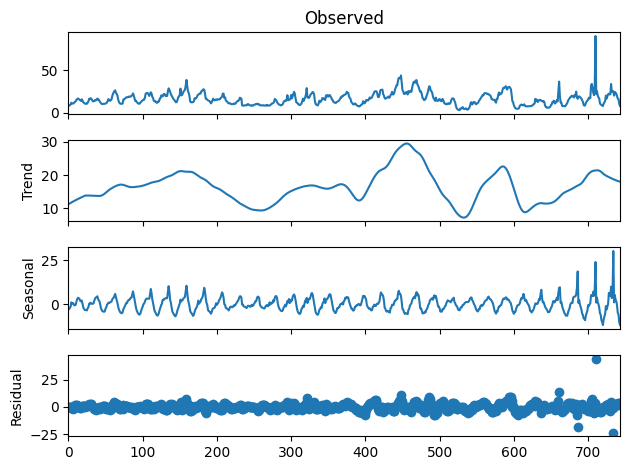

0.13532012126513324


In [115]:
decompose_result = STL(all_dfs[0]['pm25'][:24*31].to_numpy(), period=24).fit()
decompose_result.plot()
plt.show()
print((np.abs(decompose_result.resid) / np.abs(decompose_result.trend)).mean())


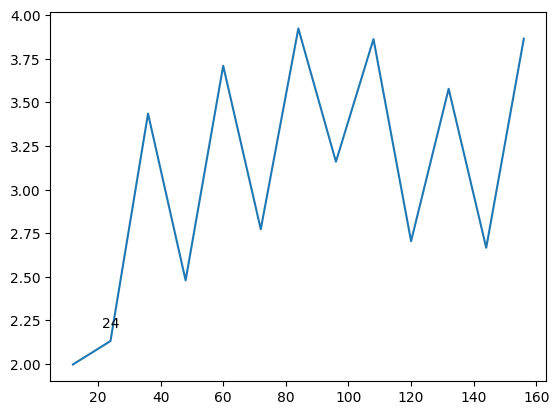

In [113]:
resids = []
for period in range(12, 24 * 7, 12):
    res = STL(all_dfs[0]['pm25'][:24*31].to_numpy(), period=period).fit()
    resids.append(np.abs(res.resid).mean())
plt.plot(np.arange(12, 24 * 7, 12), resids)
plt.annotate('24', (24, resids[1]), textcoords="offset points", xytext=(0, 10), ha='center')
plt.show()

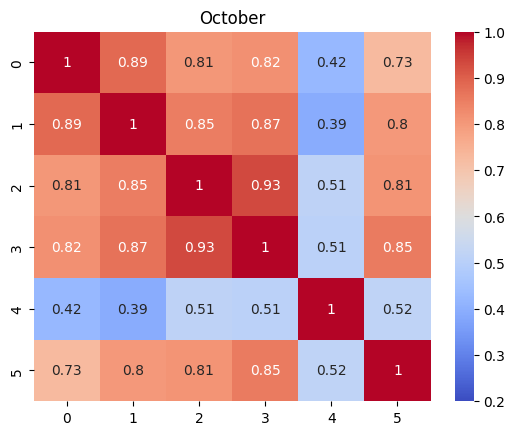

In [116]:
cov_matrix = np.eye(6)
for i in range(6):
    for j in range(i+1, 6):
        seq1 = np.ma.masked_invalid(all_dfs[i]["pm25"][:24*31].to_numpy())
        seq2 = np.ma.masked_invalid(all_dfs[j]["pm25"][:24*31].to_numpy())
        corr = np.ma.corrcoef(seq1, seq2)[0, 1]
        cov_matrix[i, j] = corr
        cov_matrix[j, i] = cov_matrix[i, j]

ax = sns.heatmap(cov_matrix, annot=True, cmap='coolwarm', vmin=0.2, vmax=1)
plt.title("October")
plt.show()

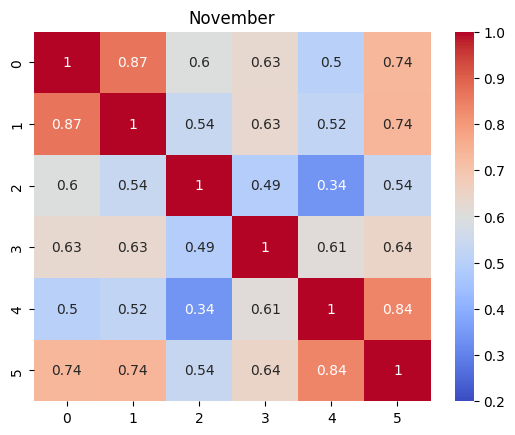

In [48]:
cov_matrix = np.eye(6)
for i in range(6):
    for j in range(i+1, 6):
        seq1 = np.ma.masked_invalid(all_dfs[i]["pm25"][24*31:24*61].to_numpy())
        seq2 = np.ma.masked_invalid(all_dfs[j]["pm25"][24*31:24*61].to_numpy())
        corr = np.ma.corrcoef(seq1, seq2)[0, 1]
        cov_matrix[i, j] = corr
        cov_matrix[j, i] = cov_matrix[i, j]

ax = sns.heatmap(cov_matrix, annot=True, cmap='coolwarm', vmin=0.2, vmax=1)
plt.title("November")
plt.show()

In [49]:
seq1 = area1_dfs[0]["pm25"][24*31:24*61]
seq2 = area2_dfs[1]["pm25"][24*31:24*61]
corr = np.corrcoef(seq1, seq2)[0, 1]
corr

0.6284883725922357

In [38]:
seq1

,year,month,day,hour,weekday,longitude,latitude,pm25
0,2023,10,1,0,6,-119.77737,36.710896,8.227333
1,2023,10,1,1,6,-119.77737,36.710896,8.321167
2,2023,10,1,2,6,-119.77737,36.710896,9.317833
3,2023,10,1,3,6,-119.77737,36.710896,9.771000
4,2023,10,1,4,6,-119.77737,36.710896,11.886333
...,...,...,...,...,...,...,...,...
739,2023,10,31,19,1,-119.77737,36.710896,19.544167
740,2023,10,31,20,1,-119.77737,36.710896,16.768500
741,2023,10,31,21,1,-119.77737,36.710896,16.305167
742,2023,10,31,22,1,-119.77737,36.710896,10.614833
